<a href="https://www.kaggle.com/code/alihandemirel/comparison-of-ab-test-and-conversion-of-bidding-me?scriptVersionId=111444510" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# BUSINESS PROBLEM

Facebook recently introduced what's called "maximum bidding".
introduced a new type of bidding, "average bidding," as an alternative to the bidding type.

One of our clients, bombabomba.com, decided to test this new feature and would like to do an A/B test to see if average bidding converts more than maximum bidding. The A/B test has been going on for 1 month and bombabomba.com is now waiting for you to analyze the results of this A/B test. The ultimate success criterion for Bombabomba.com is Purchase. Therefore, the focus should be on the Purchase metric for statistical testing.

## DATASET STORY

In this data set, which includes the website information of a company, there is information such as the number of advertisements that users see and click, as well as earnings information from here. There are two separate data sets, the control and test groups. These datasets are in separate sheets of the ab_testing.xlsx excel. Maximum Bidding was applied to the control group and Average Bidding was applied to the test group.

**Impression :** Ad views

**Click :** Number of clicks on the displayed ad

**Purchase:** Number of products purchased after ads clicked

**Earning:** Earnings after purchased products

In [1]:
!pip install statsmodels

In [2]:
#Necessary libraries are imported.
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
df_ = pd.read_excel("../input/ab-testing/ab_testing.xlsx",sheet_name='Control Group')

In [4]:
df1_ = pd.read_excel("../input/ab-testing/ab_testing.xlsx",sheet_name='Test Group')

In [5]:
df = df_.copy()
df1 = df1_.copy()

# DATA OVERVİEW CONTROL GROUP

In [6]:
#Number of rows and columns of the dataset
df.shape

(40, 4)

In [7]:
#The first 5 rows of the dataset were looked at.
df.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


In [8]:
#The last 5 rows of the dataset were viewed.
df.tail()

,Impression,Click,Purchase,Earning
35,132064.21900,3747.15754,551.07241,2256.97559
36,86409.94180,4608.25621,345.04603,1781.35769
37,123678.93423,3649.07379,476.16813,2187.72122
38,101997.49410,4736.35337,474.61354,2254.56383
39,121085.88122,4285.17861,590.40602,1289.30895


In [9]:
#It was checked for missing data in the dataset.
df.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [10]:
#Variable types and numbers of the data set were examined.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [11]:
#The statistical properties of the columns of the data set containing numeric data were checked.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,101711.44907,20302.15786,45475.94296,85726.69035,99790.70108,115212.81654,147539.33633
Click,40.00000,5100.65737,1329.98550,2189.75316,4124.30413,5001.22060,5923.80360,7959.12507
Purchase,40.00000,550.89406,134.10820,267.02894,470.09553,531.20631,637.95709,801.79502
Earning,40.00000,1908.56830,302.91778,1253.98952,1685.84720,1975.16052,2119.80278,2497.29522


In [12]:
#The number of unique values for each variable in the dataset was looked at.
df.nunique()

Impression    40
Click         40
Purchase      40
Earning       40
dtype: int64

Text(0.5, 1.0, 'Heatmap Correlation of Control Group')

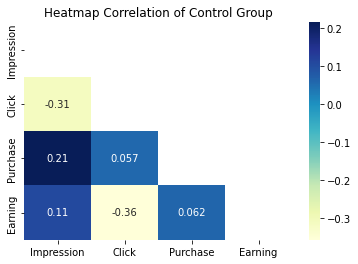

In [13]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=mask).set_title('Heatmap Correlation of Control Group')

# DATA OVERVİEW TEST GROUP

In [14]:
#Number of rows and columns of the dataset
df1.shape

(40, 4)

In [15]:
#The first 5 rows of the dataset were looked 
df1.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


In [16]:
#The last 5 rows of the dataset were viewed.
df1.tail()

,Impression,Click,Purchase,Earning
35,79234.91193,6002.21358,382.04712,2277.86398
36,130702.23941,3626.32007,449.82459,2530.84133
37,116481.87337,4702.78247,472.45373,2597.91763
38,79033.83492,4495.42818,425.35910,2595.85788
39,102257.45409,4800.06832,521.31073,2967.51839


In [17]:
#It was checked for missing data in the dataset.
df1.isnull().sum()

Impression    0
Click         0
Purchase      0
Earning       0
dtype: int64

In [18]:
#Variable types and numbers of the data set were examined.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


In [19]:
#The statistical properties of the columns of the data set containing numeric data were checked.
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,40.00000,120512.41176,18807.44871,79033.83492,112691.97077,119291.30077,132050.57893,158605.92048
Click,40.00000,3967.54976,923.09507,1836.62986,3376.81902,3931.35980,4660.49791,6019.69508
Purchase,40.00000,582.10610,161.15251,311.62952,444.62683,551.35573,699.86236,889.91046
Earning,40.00000,2514.89073,282.73085,1939.61124,2280.53743,2544.66611,2761.54540,3171.48971


In [20]:
#The number of unique values for each variable in the dataset was looked at.
df1.nunique()

Impression    40
Click         40
Purchase      40
Earning       40
dtype: int64

Text(0.5, 1.0, 'Heatmap Correlation of Control Group')

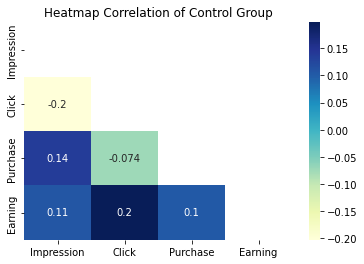

In [21]:
mask = np.triu(np.ones_like(df1.corr()))
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True, mask=mask).set_title('Heatmap Correlation of Control Group')

# DATA MANIPULATION

In [22]:
df["class"] = "control"
df1["class"] = "test"

In [23]:
#We combined the control and test groups with the concat function.
df_conc = pd.concat([df, df1], axis=0)

In [24]:
#The first 5 rows of the dataset were looked at.
df_conc.head()

,Impression,Click,Purchase,Earning,class
0,82529.45927,6090.07732,665.21125,2311.27714,control
1,98050.45193,3382.86179,315.08489,1742.80686,control
2,82696.02355,4167.96575,458.08374,1797.82745,control
3,109914.40040,4910.88224,487.09077,1696.22918,control
4,108457.76263,5987.65581,441.03405,1543.72018,control


In [25]:
#The statistical properties of the columns of the data set containing numeric data were checked
df_conc.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,80.00000,111111.93041,21623.80775,45475.94296,95063.86063,114037.03500,124138.65239,158605.92048
Click,80.00000,4534.10357,1272.37607,1836.62986,3632.89183,4321.60283,5272.61606,7959.12507
Purchase,80.00000,566.50008,148.14184,267.02894,458.13788,532.12508,679.55760,889.91046
Earning,80.00000,2211.72952,421.70058,1253.98952,1945.71316,2205.53626,2541.37752,3171.48971


# DATA VISUALIZATION

Text(0.5, 1.0, 'Impression')

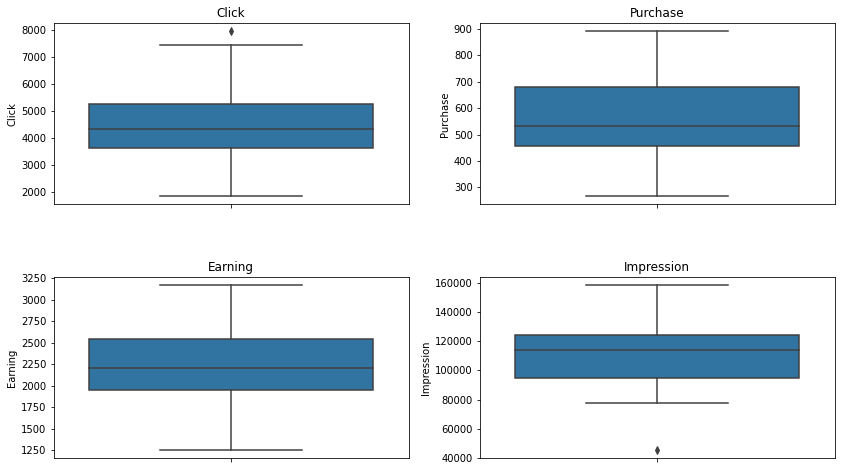

In [26]:
#Outlier values were examined.
listx = ["Click","Purchase","Earning","Impression"]
fig, axes = plt.subplots(2,2,figsize=(14, 8))
plt.subplots_adjust(hspace= 0.4)


sns.boxplot(ax=axes[0,0], y="Click" ,data=df_conc).set_title('Click')
sns.boxplot(ax=axes[0,1], y="Purchase" ,data=df_conc).set_title('Purchase')
sns.boxplot(ax=axes[1,0], y="Earning" ,data=df_conc).set_title('Earning')
sns.boxplot(ax=axes[1,1], y="Impression" ,data=df_conc).set_title('Impression')

Text(0.5, 1.0, 'Heatmap Corr')

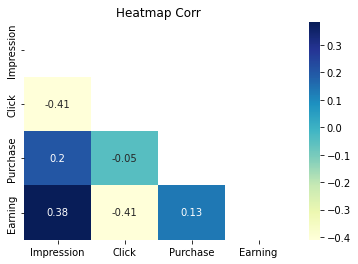

In [27]:
mask = np.triu(np.ones_like(df_conc.corr()))
sns.heatmap(df_conc.corr(), cmap="YlGnBu", annot=True, mask=mask).set_title('Heatmap Corr')

Text(0.5, 1.0, 'Average number of purchases of control and test')

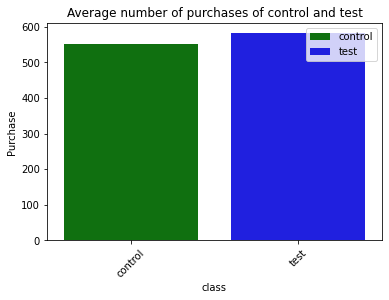

In [28]:
a= df_conc.groupby("class").agg({"Purchase" : "mean"}).reset_index()
ax = sns.barplot(data=a, y=a["Purchase"][a["class"] == "control"], x="class",label = "control",color = "green")
ax= sns.barplot(data=a, y=a["Purchase"][a["class"] == "test"], x="class",label = "test", color = "blue")
ax.set_xticklabels(["control","test"], rotation =45 )

plt.legend()
plt.title("Average number of purchases of control and test")


Text(0.5, 1.0, 'Average number of clicks of control and test')

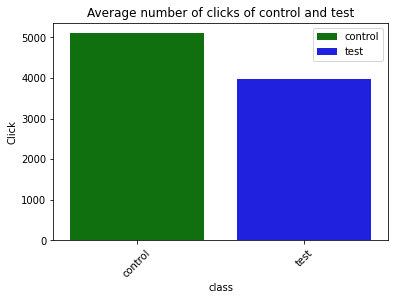

In [29]:
a= df_conc.groupby("class").agg({"Click" : "mean"}).reset_index()
ax = sns.barplot(data=a, y=a["Click"][a["class"] == "control"], x="class",label = "control",color = "green")
ax= sns.barplot(data=a, y=a["Click"][a["class"] == "test"], x="class",label = "test", color = "blue")
ax.set_xticklabels(["control","test"], rotation =45 )

plt.legend()
plt.title("Average number of clicks of control and test")

Text(0.5, 1.0, 'Average number of earning of control and test')

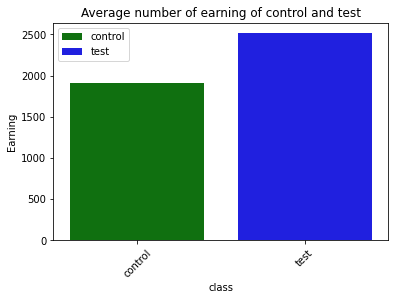

In [30]:
a= df_conc.groupby("class").agg({"Earning" : "mean"}).reset_index()
ax = sns.barplot(data=a, y=a["Earning"][a["class"] == "control"], x="class",label = "control",color = "green")
ax= sns.barplot(data=a, y=a["Earning"][a["class"] == "test"], x="class",label = "test", color = "blue")
ax.set_xticklabels(["control","test"], rotation =45 )

plt.legend()
plt.title("Average number of earning of control and test")

# Hypothesis Tests

H0 : M1 = M2 **There is NO statistically significant difference between the mean gains of the control and test groups.**

H1 : M1!= M2 **There is a statistically significant difference between the mean gains of the control and test groups.**

In [31]:
print(df["Purchase"].mean())
print(df1["Purchase"].mean())

550.8940587702316
582.1060966484677


**Assumption of Normality :**

$\blacksquare$ H0: Assumption of normal distribution is provided.

$\blacksquare$ H1: Normal distribution assumption is not provided.

$\blacksquare$ p < 0.05 H0 REJECT , p > 0.05 H0 CANNOT BE REJECTED

In [32]:
test_stat, pvalue = shapiro(df_conc.loc[df_conc["class"] == "control","Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [33]:
test_stat, pvalue = shapiro(df_conc.loc[df_conc["class"] == "test","Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


**Since our p-value is greater than 0.05, the assumption of normality is provided. So we can assume that the data is normally distributed.**

**Variance Homogeneity :**

$\blacksquare$ H0: Variances are homogeneous.

$\blacksquare$ H1: Variances are not homogeneous.

$\blacksquare$ p < 0.05 H0 REJECT , p > 0.05 H0 CANNOT BE REJECTED

In [34]:
test_stat, pvalue = levene(df_conc.loc[df_conc["class"] == "test","Purchase"], 
                           df_conc.loc[df_conc["class"] == "control","Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


**Since our p-value is greater than 0.05, variance homogeneity is ensured. So the hypothesis cannot be rejected. According to this result, the variances are homogeneously distributed.**

$\blacksquare$ H0 cannot be rejected because it has p-value > 0.05 in both groups. The assumption of normality is provided.

$\blacksquare$ H0 cannot be rejected because p-value > 0.05. The mean earnings variances of the two groups are homogeneous.

In [35]:
test_stat, pvalue = ttest_ind(df_conc.loc[df_conc["class"] == "test","Purchase"], 
                           df_conc.loc[df_conc["class"] == "control","Purchase"], equal_var=True)
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9416, p-value = 0.3493


**Since the p-value of the parametric test is greater than 0.05, there is no statistically significant difference between the purchasing averages of the control and test groups.**

**Since the assumption of normality and homogeneity of variance tests were not rejected, it was decided to apply the parametric test.**

**This conversion is not recommended as the average bidding does not convert more than the maximum bidding, as there is no statistically significant difference.**